In [1]:
#importing libraries

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# this library allows you to easily retrieve historical data from Yahoo finance.
import yfinance as yf

In [2]:
#fetching stock market data.

#defining the stock symbol and data range
stock_symbol = "AAPL"
start_date = "1980-12-12"
end_date = "2020-04-01"

#fetching the stock data.
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
#data preprocessing
#calculating a rolling average of the closing prices
stock_data['RollingAvg'] = stock_data['Close'].rolling(window=20).mean()

C:\Users\karen\AppData\Local\Temp\ipykernel_11500\462674518.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


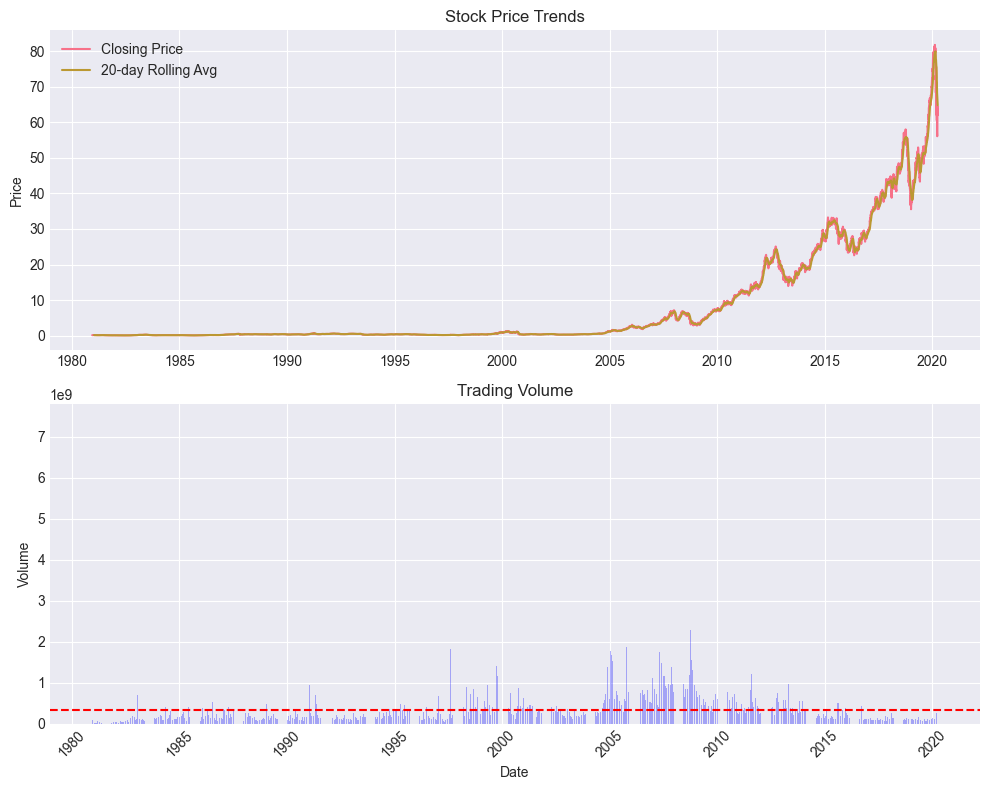

In [4]:
# setting up custom style for plots.
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting price trends
ax1.plot(stock_data.index, stock_data['Close'], label='Closing Price')
ax1.plot(stock_data.index, stock_data['RollingAvg'], label='20-day Rolling Avg')
ax1.set_title('Stock Price Trends')
ax1.set_ylabel('Price')
ax1.legend()

# Adding annotations
ax1.annotate('Dip in Price', xy=(pd.Timestamp('2022-06-01'), stock_data['Close'].min()), xytext=(pd.Timestamp('2022-03-01'), 180), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
# Plotting trading volume
ax2.bar(stock_data.index, stock_data['Volume'], color='blue', alpha=0.3)
ax2.set_title('Trading Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.grid(True)

#Adding a horizontal line at a certain volume level.
ax2.axhline(y=stock_data['Volume'].mean(), color='red', linestyle='--', label='Mean Volume')

# Format x-axis as dates
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plots
plt.show()
